<a href="https://colab.research.google.com/github/ge96lip/Quantum-Computing/blob/main/Optional_Programming_Assignment_II_Quantum_Instructions_%26_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install qiskit
!pip install qiskit_aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.4 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
import numpy as np

def initialize_state_vector():
    # Initialize the state vector to |00⟩, which is [1, 0, 0, 0] in the computational basis
    return np.array([1+0j, 0+0j, 0+0j, 0+0j])

In [ ]:
def hadamard_gate():
    # Hadamard gate for a single qubit
    H = (1/np.sqrt(2)) * np.array([[1,  1],
                                   [1, -1]])
    return H

def cnot_gate():
    # CNOT gate for two qubits
    CNOT = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]])
    return CNOT

In [ ]:
def simulate_bell_state():
    # Initialize the state vector |00⟩
    state_vector = initialize_state_vector()

    # Apply Hadamard gate to the first qubit
    H = hadamard_gate()
    # Kronecker product: Hadamard to the first qubit and does nothing to the second qubit
    H_full = np.kron(H, np.eye(2))
    # Apply the Hadamard operation to the quantum state
    state_vector = np.dot(H_full, state_vector)

    # Apply CNOT gate
    CNOT = cnot_gate()
    state_vector = np.dot(CNOT, state_vector)

    # Bell state where the second qubit is flipped when the first qubit is in state |1⟩.
    return state_vector



In [ ]:
# Print the Final State Vector:
final_state = simulate_bell_state()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Since \frac{1}{\sqrt{2}} \approx 0.70710678, the state vector should be:

[0.70710678, 0, 0, 0.70710678].
Each component has the form real_part + 0.j, meaning that the imaginary part is zero. This is should in deed be the case because the Bell state we simulated involves real-valued amplitudes for |00⟩ and |11⟩ with no imaginary components. Therefore the above result is verified and can be used for downward tasks.

In [ ]:
# Develop the Measurement Function
from collections import Counter
import matplotlib.pyplot as plt

def measure_state(state_vector, num_samples=1000):
    # Calculate probabilities by squaring the magnitude of the complex amplitudes
    probabilities = np.abs(state_vector) ** 2
    # Define the computational basis states
    basis_states = ['00', '01', '10', '11']

    # Sample based on the probabilities
    measurements = np.random.choice(basis_states, size=num_samples, p=probabilities)

    return Counter(measurements)

# Perform the measurement and store results
measurement_results = measure_state(final_state, num_samples=1000)
print(measurement_results)

Counter({'00': 505, '11': 495})


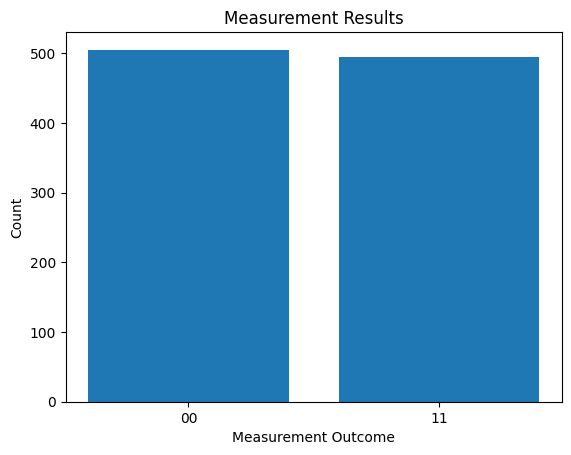

In [ ]:
# Plot the Results in a Histogram
def plot_measurement_histogram(measurement_results):
    # Plot a histogram of the measurement results
    labels, counts = zip(*measurement_results.items())
    plt.bar(labels, counts)
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Count')
    plt.title('Measurement Results')
    plt.show()

# Plot the histogram
plot_measurement_histogram(measurement_results)

### Compare with Results from Assignment 1:
The measuremnt outcome is nearly the same as it was in assignemnt 1 with the simulated AER function. One could say it is even more 50/50 for state |00> and |11> than it was in assignment 1. Which leads to assume that the simulation using the Bell Circuit is more accurate than using the AER simulator for QC simulation.

# Exercise 2: Quantum Random Number Generator
We will use Qiski to implement this quantum random number generator (QRNG).
To generate a random bit (0 or 1), we'll use a Hadamard gate to place a qubit into an equal superposition of |0⟩ and |1⟩. When we measure the qubit, it will collapse to either |0⟩ or |1⟩ with equal probability (50% chance for each outcome), making it a truly random event.

For generating multiple random bits, we'll repeatedly apply the Hadamard gate and measure the qubit.


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=655ad360fd890aa01ed03c8a3c41f66699e0f7ee4999fda67353b0c6997de072
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


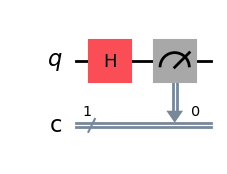

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
simulator = AerSimulator()

def create_qrng_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    # Qubit is used to generate the inherent randomness,
    # while the classical bit is used to store the measurement result
    qrng_circuit = QuantumCircuit(1, 1)

    # Apply the Hadamard gate to create a superposition
    qrng_circuit.h(0)

    # Measure the qubit
    qrng_circuit.measure(0, 0)

    return qrng_circuit

# Create the quantum circuit for QRNG
qrng_circuit = create_qrng_circuit()

# Draw the circuit in matplotlip drawing format
qrng_circuit.draw('mpl')

In [ ]:
# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Create an Aer simulator
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler

# Task 2.1: Create a quantum circuit for QRNG
def create_qrng_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    qrng_circuit = QuantumCircuit(1, 1)

    # Apply the Hadamard gate to create superposition
    qrng_circuit.h(0)

    # Measure the qubit
    qrng_circuit.measure(0, 0)

    return qrng_circuit

# Task 2.2: Execute the quantum circuit on a simulator

def run_qrng_simulator(qrng_circuit, num_shots=1000):

  simulator = AerSimulator()

  # Transpile the circuit for the simulator
  compiled_circuit = transpile(qrng_circuit, simulator)

  # Run the simulation
  job = simulator.run(compiled_circuit)

  # Get the results
  result = job.result()
  print(result.get_counts(qrng_circuit))
  return result.get_counts(qrng_circuit)


# Task 2.5: Perform statistical tests to assess randomness
def randomness_assessment(counts):
    # Frequency Test: Check for the uniformity of 0s and 1s
    total_counts = sum(counts.values())
    p_0 = counts.get('0', 0) / total_counts
    p_1 = counts.get('1', 0) / total_counts

    print(f"Frequency Test Results: p(0) = {p_0}, p(1) = {p_1}")

    # Serial Test: Check for correlation between consecutive bits
    random_bits = []
    for bit, count in counts.items():
        random_bits.extend([bit] * count)

    # Perform the serial test: check if there is any correlation between consecutive bits
    serial_test_result = all(random_bits[i] != random_bits[i+1] for i in range(len(random_bits)-1))

    print(f"Serial Test Result (no consecutive identical bits): {serial_test_result}")




In [ ]:

# Task 2.1: Create the QRNG circuit
qrng_circuit = create_qrng_circuit()

# Task 2.2: Run the quantum circuit on the simulator
simulator_counts = run_qrng_simulator(qrng_circuit, 1000)
print(f"Simulator Results: {simulator_counts}")


{'0': 516, '1': 508}
Simulator Results: {'0': 516, '1': 508}


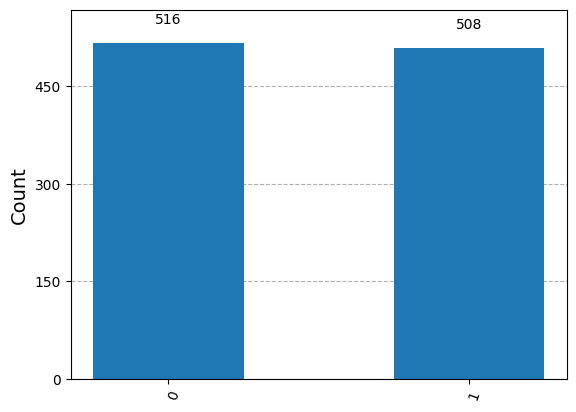

In [ ]:
# Task 2.3: Plot the results from the simulator
plot_histogram(simulator_counts)

In [ ]:

# Task 2.5: Perform randomness assessment on the simulator results
randomness_assessment(simulator_counts)

Frequency Test Results: p(0) = 0.50390625, p(1) = 0.49609375
Serial Test Result (no consecutive identical bits): False


In [ ]:

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token='6af33505cb9a8ba8133690ae424119590cac857ffa29fab8997750494c984679d123e83f4a50587541c11d079396e927221ffe4334391cb07c7ebe16dbdddeb1', overwrite=True)

# Load your saved account
service = QiskitRuntimeService()


In [ ]:
# List available cloud backends
print('\nCloud backends:')
for backend in service.backends():
    print(backend.name)


Cloud backends:
ibm_brisbane
ibm_kyiv
ibm_sherbrooke


In [ ]:

# Task 2.5: Compare randomness of simulator and real quantum computer (Optional)
num_shots = 1024

# Get a real quantum backend (replace 'ibmq_qasm_simulator' with a real device like 'ibmq_athens')
service = QiskitRuntimeService()
backend = service.get_backend('ibm_sherbrooke')  # Replace with a real quantum backend if available

# Execute the circuit on the quantum computer

transpiled_circuit = transpile(qrng_circuit, backend)
sampler = Sampler(backend=backend)
job = sampler.run([transpiled_circuit], shots=num_shots)

# Wait for the job to complete
job.result()  # This will wait for the job to complete

# Get the results
result = job.result()

<ipython-input-18-6db7ee493ceb>:6: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = service.get_backend('ibm_sherbrooke')  # Replace with a real quantum backend if available
<ipython-input-18-6db7ee493ceb>:11: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [ ]:
print(result)

PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-09-16 12:17:38', stop='2024-09-16 12:17:51', size=1024>)])}, 'version': 2})


In [ ]:
print(result[0].data)
# Get the measurement results
counts = result[0].data['c'].get_counts()

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>))


In [ ]:
print(f"IBM Quantum Computer Results: {counts}")

IBM Quantum Computer Results: {'1': 525, '0': 499}
